In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


$$W_{country}= \frac{S018 \times Population_{country}}{1000}$$


**Q196** Government has the right: Keep people under video surveillance in public areas (WVS - 7)

Do you think this country’s government should or should not have the right to do the
following: Keep people under video surveillance in public areas  
1.- Definitely should have the right  
2.- Probably should have the right  
3.- Probably should not have the right   
4.- Definitely should not have the right   
-1-.- Don ́t know  
-2-.- No answer  
-4-.- Not asked  
-5-.- Missing; Not available  

In [53]:
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_Q196 = data[['B_COUNTRY_ALPHA','Q196']]
country_Q196 = country_Q196[country_Q196.Q196 > 0]
print(country_Q196.head())
country_Q196.Q196 = country_Q196.Q196.apply(lambda x: 1 if x == 1 else 0)
print(country_Q196.head())

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1407/3551094594.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


  B_COUNTRY_ALPHA  Q196
0             AND     2
1             AND     1
2             AND     4
3             AND     2
4             AND     1
  B_COUNTRY_ALPHA  Q196
0             AND     0
1             AND     1
2             AND     0
3             AND     0
4             AND     1


In [48]:
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_S018 = data[['B_COUNTRY_ALPHA','S018']]
weights_country = country_S018.groupby('B_COUNTRY_ALPHA')['S018'].max().reset_index()

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1407/2372797264.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


In [51]:
country_S018[country_S018.B_COUNTRY_ALPHA == 'URY']

,B_COUNTRY_ALPHA,S018
91641,URY,1.0
91642,URY,1.0
91643,URY,1.0
91644,URY,1.0
91645,URY,1.0
...,...,...
92636,URY,1.0
92637,URY,1.0
92638,URY,1.0
92639,URY,1.0


In [54]:
country_Q196.groupby('B_COUNTRY_ALPHA').value_counts()

B_COUNTRY_ALPHA  Q196
AND              0        654
                 1        349
ARG              0        771
                 1        181
ARM              0        968
                         ... 
VEN              1        262
VNM              0       1025
                 1        175
ZWE              0        948
                 1        254
Length: 126, dtype: int64

In [55]:
country_Q196 = country_Q196.groupby('B_COUNTRY_ALPHA')['Q196'].mean().reset_index()

In [56]:
weights_country

,B_COUNTRY_ALPHA,S018
0,AND,0.996016
1,ARG,0.997009
2,ARM,0.817662
3,AUS,0.551572
4,BGD,0.833333
...,...,...
59,URY,1.000000
60,USA,0.385208
61,VEN,0.840336
62,VNM,0.833333


In [57]:
country_Q196

,B_COUNTRY_ALPHA,Q196
0,AND,0.347956
1,ARG,0.190126
2,ARM,0.185870
3,AUS,0.410784
4,BGD,0.617438
...,...,...
58,URY,0.311728
59,USA,0.221012
60,VEN,0.220168
61,VNM,0.145833


In [58]:
merged_df = weights_country.merge(country_Q196,how = 'outer', on = 'B_COUNTRY_ALPHA')
merged_df['final_q196'] = merged_df['Q196'] * merged_df['S018']
merged_df

,B_COUNTRY_ALPHA,S018,Q196,final_q196
0,AND,0.996016,0.347956,0.346570
1,ARG,0.997009,0.190126,0.189557
2,ARM,0.817662,0.185870,0.151979
3,AUS,0.551572,0.410784,0.226577
4,BGD,0.833333,0.617438,0.514531
...,...,...,...,...
59,URY,1.000000,0.311728,0.311728
60,USA,0.385208,0.221012,0.085135
61,VEN,0.840336,0.220168,0.185015
62,VNM,0.833333,0.145833,0.121528


In [59]:
merged_df.drop(columns=['S018','Q196'],inplace=True)

In [8]:
individual_collective = pd.read_csv('6-dimensions-for-website-2015-08-16.csv',sep=';', na_values='#NULL!')


In [9]:
individual_collective['normalized_idv'] = 1 - (individual_collective['idv'] - individual_collective['idv'].min()) / (individual_collective['idv'].max() - individual_collective['idv'].min())


In [10]:
individual_collective.drop(columns=['country',	'pdi',	'idv',	'mas',	'uai',	'ltowvs','ivr'],inplace=True)
individual_collective = individual_collective[~individual_collective.normalized_idv.isna()]
individual_collective

,ctr,normalized_idv
0,AFE,0.752941
1,AFW,0.835294
5,ARA,0.623529
6,ARG,0.529412
8,AUL,0.011765
...,...,...
102,TUR,0.635294
103,USA,0.000000
106,URU,0.647059
107,VEN,0.929412


In [11]:
individual_collective.rename(columns={'ctr': 'B_COUNTRY_ALPHA'}, inplace=True)
individual_collective

,B_COUNTRY_ALPHA,normalized_idv
0,AFE,0.752941
1,AFW,0.835294
5,ARA,0.623529
6,ARG,0.529412
8,AUL,0.011765
...,...,...
102,TUR,0.635294
103,USA,0.000000
106,URU,0.647059
107,VEN,0.929412


In [9]:
individual_collective.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   B_COUNTRY_ALPHA  111 non-null    object 
 1   country          111 non-null    object 
 2   pdi              78 non-null     float64
 3   idv              78 non-null     float64
 4   mas              78 non-null     float64
 5   uai              78 non-null     float64
 6   ltowvs           96 non-null     float64
 7   ivr              97 non-null     float64
 8   normalized_idv   78 non-null     float64
dtypes: float64(7), object(2)
memory usage: 7.9+ KB


TypeError: sort_values() missing 1 required positional argument: 'by'

In [64]:
merged_df = merged_df.merge(individual_collective,how = 'outer',on='B_COUNTRY_ALPHA')
merged_df

,B_COUNTRY_ALPHA,final_q196,normalized_idv
0,AND,0.346570,NaN
1,ARG,0.189557,0.529412
2,ARM,0.151979,NaN
3,AUS,0.226577,NaN
4,BGD,0.514531,NaN
...,...,...,...
119,SWG,NaN,0.258824
120,TAI,NaN,0.870588
121,TRI,NaN,0.882353
122,URU,NaN,0.647059


In [65]:
merged_df = merged_df[~merged_df.final_q196.isna()]
merged_df = merged_df[~merged_df.normalized_idv.isna()]
merged_df

,B_COUNTRY_ALPHA,final_q196,normalized_idv
1,ARG,0.189557,0.529412
6,BRA,0.196468,0.623529
7,CAN,0.035183,0.129412
8,CHL,0.211180,0.800000
10,COL,0.194339,0.917647
12,CZE,0.106458,0.388235
17,GBR,0.107702,0.023529
25,JPN,0.094803,0.529412
29,KOR,0.051612,0.858824
35,MEX,0.150055,0.717647


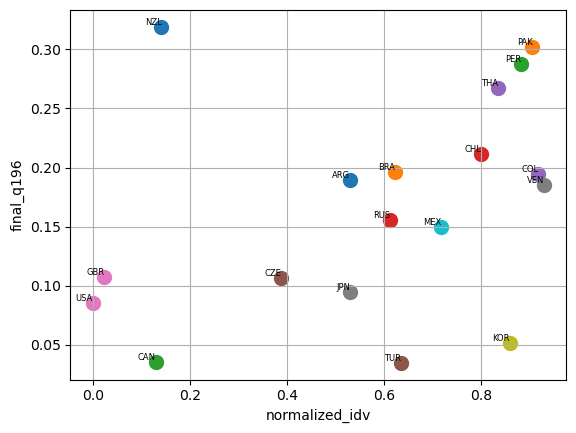

In [66]:

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['normalized_idv'], row['final_q196'], label=row['B_COUNTRY_ALPHA'],s = 100)
    plt.text(row['normalized_idv'], row['final_q196'], row['B_COUNTRY_ALPHA'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('normalized_idv')
plt.ylabel('final_q196')



# Show the plot
plt.grid()

In [68]:

data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_Q197 = data[['B_COUNTRY_ALPHA','Q197']]
country_Q197 = country_Q197[country_Q197.Q197 > 0]
print(country_Q197.head())
country_Q197.Q197 = country_Q197.Q197.apply(lambda x: 1 if x == 1 else 0)
print(country_Q197.head())

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1407/2853530746.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


  B_COUNTRY_ALPHA  Q197
0             AND     4
1             AND     4
2             AND     4
3             AND     4
4             AND     4
  B_COUNTRY_ALPHA  Q197
0             AND     0
1             AND     0
2             AND     0
3             AND     0
4             AND     0


In [69]:
country_Q197.groupby('B_COUNTRY_ALPHA').value_counts()

B_COUNTRY_ALPHA  Q197
AND              0        967
                 1         37
ARG              0        888
                 1         71
ARM              0       1006
                         ... 
VEN              1         61
VNM              0       1151
                 1         49
ZWE              0       1019
                 1        180
Length: 126, dtype: int64

In [70]:
country_Q197 = country_Q197.groupby('B_COUNTRY_ALPHA')['Q197'].mean().reset_index()
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_S018 = data[['B_COUNTRY_ALPHA','S018']]
weights_country = country_S018.groupby('B_COUNTRY_ALPHA')['S018'].max().reset_index()

merged_df = weights_country.merge(country_Q197,how = 'outer', on = 'B_COUNTRY_ALPHA')
merged_df['final_q197'] = merged_df['Q197'] * merged_df['S018']
merged_df


/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1407/716661506.py:2: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


,B_COUNTRY_ALPHA,S018,Q197,final_q197
0,AND,0.996016,0.036853,0.036706
1,ARG,0.997009,0.074035,0.073814
2,ARM,0.817662,0.128250,0.104865
3,AUS,0.551572,0.075851,0.041837
4,BGD,0.833333,0.247544,0.206287
...,...,...,...,...
59,URY,1.000000,0.080164,0.080164
60,USA,0.385208,0.045010,0.017338
61,VEN,0.840336,0.051261,0.043076
62,VNM,0.833333,0.040833,0.034028


In [71]:
merged_df.drop(columns='Q197',inplace=True)

In [73]:
merged_df = merged_df.merge(individual_collective,how ='outer',on='B_COUNTRY_ALPHA')
merged_df

,B_COUNTRY_ALPHA,S018,final_q197,normalized_idv
0,AND,0.996016,0.036706,NaN
1,ARG,0.997009,0.073814,0.529412
2,ARM,0.817662,0.104865,NaN
3,AUS,0.551572,0.041837,NaN
4,BGD,0.833333,0.206287,NaN
...,...,...,...,...
119,SWG,NaN,NaN,0.258824
120,TAI,NaN,NaN,0.870588
121,TRI,NaN,NaN,0.882353
122,URU,NaN,NaN,0.647059


In [74]:
merged_df.drop(columns='S018',inplace=True)
merged_df = merged_df[~merged_df.final_q197.isna()]
merged_df = merged_df[~merged_df.normalized_idv.isna()]
merged_df

,B_COUNTRY_ALPHA,final_q197,normalized_idv
1,ARG,0.073814,0.529412
6,BRA,0.060146,0.623529
7,CAN,0.010282,0.129412
8,CHL,0.050883,0.800000
10,COL,0.081371,0.917647
12,CZE,0.028249,0.388235
17,GBR,0.021052,0.023529
25,JPN,0.025890,0.529412
29,KOR,0.018709,0.858824
35,MEX,0.052790,0.717647


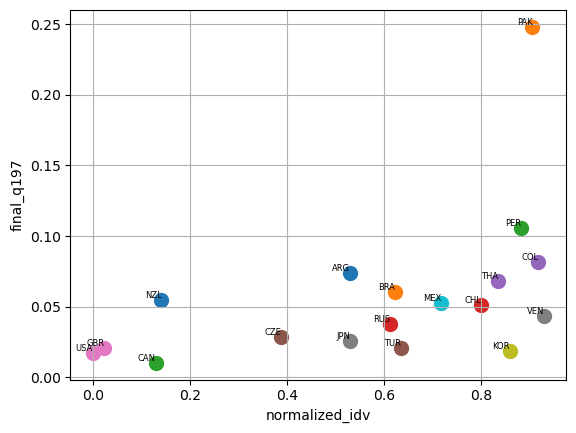

In [75]:

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['normalized_idv'], row['final_q197'], label=row['B_COUNTRY_ALPHA'],s = 100)
    plt.text(row['normalized_idv'], row['final_q197'], row['B_COUNTRY_ALPHA'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('normalized_idv')
plt.ylabel('final_q197')



# Show the plot
plt.grid()

In [80]:
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_Q30 = data[['B_COUNTRY_ALPHA','Q30']]
country_Q30 = country_Q30[country_Q30.Q30 > 0]
print(country_Q30.head())
country_Q30.Q30 = country_Q30.Q30.apply(lambda x: 1 if x == 1 else 0)
print(country_Q30.head())

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1407/651068867.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


  B_COUNTRY_ALPHA  Q30
0             AND    3
1             AND    3
2             AND    3
3             AND    4
4             AND    3
  B_COUNTRY_ALPHA  Q30
0             AND    0
1             AND    0
2             AND    0
3             AND    0
4             AND    0


In [82]:
country_Q30 = country_Q30.groupby('B_COUNTRY_ALPHA')['Q30'].mean().reset_index()
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_S018 = data[['B_COUNTRY_ALPHA','S018']]
weights_country = country_S018.groupby('B_COUNTRY_ALPHA')['S018'].max().reset_index()

merged_df = weights_country.merge(country_Q30,how = 'outer', on = 'B_COUNTRY_ALPHA')
merged_df['final_q30'] = merged_df['Q30'] * merged_df['S018']
merged_df

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1407/1665682548.py:2: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


,B_COUNTRY_ALPHA,S018,Q30,final_q30
0,AND,0.996016,0.006993,0.006965
1,ARG,0.997009,0.043788,0.043657
2,ARM,0.817662,0.062449,0.051062
3,AUS,0.551572,0.009465,0.005221
4,BGD,0.833333,0.189446,0.157872
...,...,...,...,...
59,URY,1.000000,0.009615,0.009615
60,USA,0.385208,0.020495,0.007895
61,VEN,0.840336,0.057143,0.048019
62,VNM,0.833333,0.035000,0.029167


In [83]:
merged_df.drop(columns='Q30',inplace=True)
merged_df = merged_df.merge(individual_collective,how ='outer',on='B_COUNTRY_ALPHA')
merged_df.drop(columns='S018',inplace=True)
merged_df = merged_df[~merged_df.final_q30.isna()]
merged_df = merged_df[~merged_df.normalized_idv.isna()]


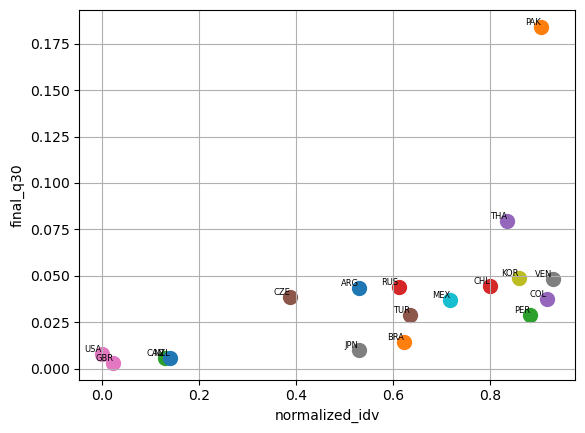

In [84]:

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['normalized_idv'], row['final_q30'], label=row['B_COUNTRY_ALPHA'],s = 100)
    plt.text(row['normalized_idv'], row['final_q30'], row['B_COUNTRY_ALPHA'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('normalized_idv')
plt.ylabel('final_q30')



# Show the plot
plt.grid()


Numeric variable [makes the sample size of all countries equal to the same amount of N=1000]. Equilibrated weights have been calculated using the formula: 1.000/sample size. Equilibrated weight can be used when all countries and territories involved in the analysis are required to be treated as equal units, regardless of their population or sample size. The weights to be used are the product of the W_WEIGHT and S018.

W_WEIGHT

Numeric variable. This weight is aimed at adjusting some sociodemographic characteristics in the sample population to the distribution of the target population. It has been computed using the marginal distribution of Age, Sex, Education and Region.

In [85]:
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_weight = data[['B_COUNTRY_ALPHA','W_WEIGHT']]

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1407/3822935791.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


,B_COUNTRY_ALPHA,W_WEIGHT
0,AND,1.000000
1,AND,1.000000
2,AND,1.000000
3,AND,1.000000
4,AND,1.000000
...,...,...
94273,NIR,4.000927
94274,NIR,4.647936
94275,NIR,4.848000
94276,NIR,4.848000


In [52]:
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_Q196 = data[['B_COUNTRY_ALPHA','Q196','W_WEIGHT']]
country_Q196 = country_Q196[country_Q196.Q196 > 0]
print(country_Q196.head())
country_Q196.Q196 = country_Q196.Q196.apply(lambda x: 1 if x == 1 else 0)
print(country_Q196.head())

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1302/1239569839.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


  B_COUNTRY_ALPHA  Q196  W_WEIGHT
0             AND     2       1.0
1             AND     1       1.0
2             AND     4       1.0
3             AND     2       1.0
4             AND     1       1.0
  B_COUNTRY_ALPHA  Q196  W_WEIGHT
0             AND     0       1.0
1             AND     1       1.0
2             AND     0       1.0
3             AND     0       1.0
4             AND     1       1.0


In [53]:
country_Q196['weighted_Q196'] = country_Q196.Q196 * country_Q196.W_WEIGHT
country_Q196

,B_COUNTRY_ALPHA,Q196,W_WEIGHT,weighted_Q196
0,AND,0,1.000000,0.000
1,AND,1,1.000000,1.000
2,AND,0,1.000000,0.000
3,AND,0,1.000000,0.000
4,AND,1,1.000000,1.000
...,...,...,...,...
94273,NIR,0,4.000927,0.000
94274,NIR,0,4.647936,0.000
94275,NIR,1,4.848000,4.848
94276,NIR,0,4.848000,0.000


In [54]:
country_Q196.drop(columns=['Q196','W_WEIGHT'],inplace=True)
country_Q196 = country_Q196.groupby('B_COUNTRY_ALPHA')['weighted_Q196'].mean().reset_index()
country_Q196

,B_COUNTRY_ALPHA,weighted_Q196
0,AND,0.347956
1,ARG,0.196514
2,ARM,0.191286
3,AUS,0.405850
4,BGD,0.617438
...,...,...
58,URY,0.338637
59,USA,0.229627
60,VEN,0.220168
61,VNM,0.145833


In [55]:
merged_df = country_Q196.merge(individual_collective,how ='outer',on='B_COUNTRY_ALPHA')
merged_df = merged_df[~merged_df.weighted_Q196.isna()]
merged_df = merged_df[~merged_df.normalized_idv.isna()]





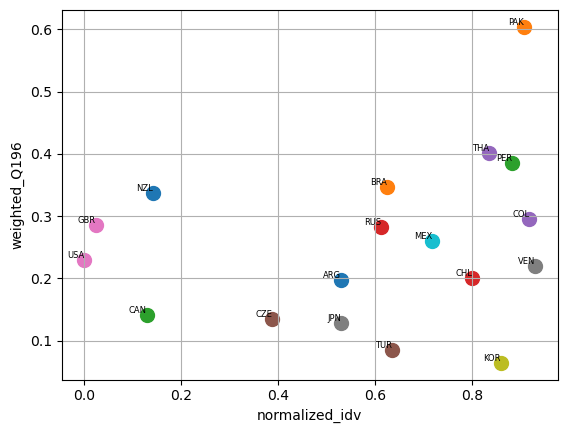

In [12]:
# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['normalized_idv'], row['weighted_Q196'], label=row['B_COUNTRY_ALPHA'],s = 100)
    plt.text(row['normalized_idv'], row['weighted_Q196'], row['B_COUNTRY_ALPHA'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('normalized_idv')
plt.ylabel('weighted_Q196')



# Show the plot
plt.grid()

In [13]:
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_Q30 = data[['B_COUNTRY_ALPHA','Q30','W_WEIGHT']]
country_Q30 = country_Q30[country_Q30.Q30 > 0]
print(country_Q30.head())
country_Q30.Q30 = country_Q30.Q30.apply(lambda x: 1 if x == 1 else 0)
print(country_Q30.head())

country_Q30['weighted_Q30'] = country_Q30.Q30 * country_Q30.W_WEIGHT
country_Q30.drop(columns=['Q30','W_WEIGHT'],inplace=True)
country_Q30 = country_Q30.groupby('B_COUNTRY_ALPHA')['weighted_Q30'].mean().reset_index()

merged_df = country_Q30.merge(individual_collective,how ='outer',on='B_COUNTRY_ALPHA')
merged_df = merged_df[~merged_df.weighted_Q30.isna()]
merged_df = merged_df[~merged_df.normalized_idv.isna()]

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1897/2852433018.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


  B_COUNTRY_ALPHA  Q30  W_WEIGHT
0             AND    3       1.0
1             AND    3       1.0
2             AND    3       1.0
3             AND    4       1.0
4             AND    3       1.0
  B_COUNTRY_ALPHA  Q30  W_WEIGHT
0             AND    0       1.0
1             AND    0       1.0
2             AND    0       1.0
3             AND    0       1.0
4             AND    0       1.0


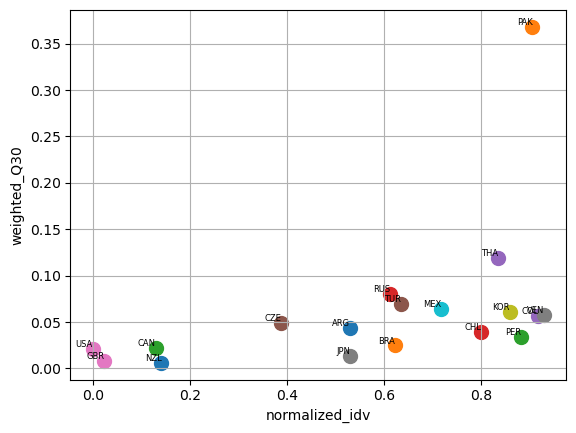

In [14]:
# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['normalized_idv'], row['weighted_Q30'], label=row['B_COUNTRY_ALPHA'],s = 100)
    plt.text(row['normalized_idv'], row['weighted_Q30'], row['B_COUNTRY_ALPHA'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('normalized_idv')
plt.ylabel('weighted_Q30')



# Show the plot
plt.grid()

In [56]:

#gdp per capita in US$
gdp_countries = pd.read_csv('gdp_countries.csv',skiprows=4)

gdp_countries.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,...,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,...,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158,NaN


In [57]:
#wave 7 2017-2022
gdp_countries = gdp_countries[['Country Code', '2017','2018','2019','2020','2021','2022']]
gdp_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  266 non-null    object 
 1   2017          258 non-null    float64
 2   2018          258 non-null    float64
 3   2019          258 non-null    float64
 4   2020          258 non-null    float64
 5   2021          252 non-null    float64
 6   2022          234 non-null    float64
dtypes: float64(6), object(1)
memory usage: 14.7+ KB


In [58]:
gdp_countries.rename(columns={'Country Code': 'B_COUNTRY_ALPHA'}, inplace=True)

In [13]:
gdp_countries.head()

,B_COUNTRY_ALPHA,2017,2018,2019,2020,2021,2022
0,ABW,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN
1,AFE,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
2,AFG,530.149863,502.057099,500.522981,516.866797,363.674087,NaN
3,AFW,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
4,AGO,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158


In [59]:
gdp_countries['GDP_per_capita'] = gdp_countries[['2017', '2018', '2019', '2020', '2021', '2022']].mean(axis = 1)
gdp_countries.head()

,B_COUNTRY_ALPHA,2017,2018,2019,2020,2021,2022,GDP_per_capita
0,ABW,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN,29195.590031
1,AFE,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720,1529.869913
2,AFG,530.149863,502.057099,500.522981,516.866797,363.674087,NaN,482.654165
3,AFW,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800,1729.207927
4,AGO,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158,2219.687217


In [60]:
gdp_countries.drop(columns=['2017','2018','2019','2020','2021','2022'],inplace=True)


In [61]:
merged_df = merged_df.merge(gdp_countries,how='outer',on='B_COUNTRY_ALPHA')
merged_df[(~merged_df.normalized_idv.isna())&(~merged_df.GDP_per_capita.isna())]

,B_COUNTRY_ALPHA,weighted_Q196,normalized_idv,GDP_per_capita
0,ARG,0.196514,0.529412,11531.737532
1,BRA,0.346510,0.623529,8566.870194
2,CAN,0.141270,0.129412,48121.027594
3,CHL,0.199921,0.800000,15039.445811
4,COL,0.295395,0.917647,6297.632846
5,CZE,0.134384,0.388235,24196.549187
6,GBR,0.285109,0.023529,43238.469794
7,JPN,0.128268,0.529412,38771.752578
8,KOR,0.064257,0.858824,32654.981291
9,MEX,0.260337,0.717647,9871.419570


In [62]:
merged_df = merged_df[(~merged_df.normalized_idv.isna())&(~merged_df.GDP_per_capita.isna())]

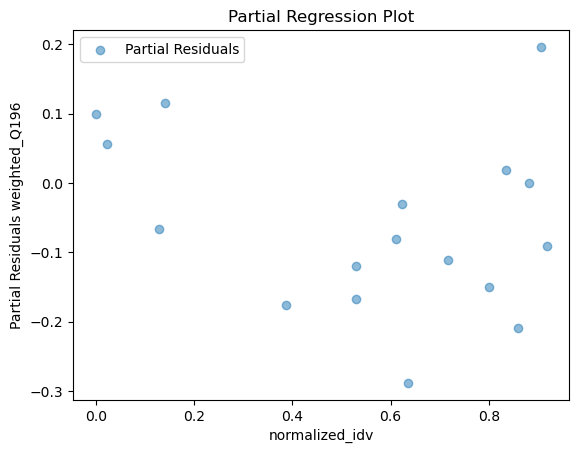

In [28]:



# Fit a linear regression model with control variable
model = sm.OLS(merged_df['weighted_Q196'], sm.add_constant(merged_df[['normalized_idv', 'GDP_per_capita']])).fit()

# Calculate the partial residuals
partial_residuals = model.resid + merged_df['normalized_idv'] * model.params['normalized_idv']

# Create the partial regression plot
plt.scatter(merged_df['normalized_idv'], partial_residuals, label='Partial Residuals', alpha=0.5)
plt.xlabel('normalized_idv')
plt.ylabel('Partial Residuals weighted_Q196')
plt.title('Partial Regression Plot')
plt.legend()
plt.show()


https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_partregress.html

eval_env: 1


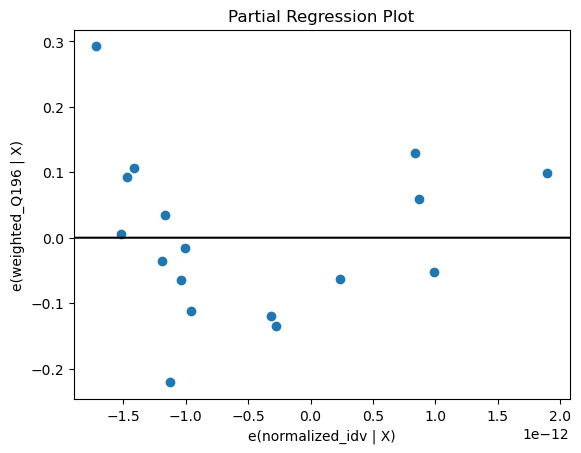

In [34]:
sm.graphics.plot_partregress(data = merged_df,endog = 'weighted_Q196',exog_i = 'normalized_idv',exog_others=['normalized_idv','GDP_per_capita'],obs_labels=False)
plt.show()

eval_env: 1


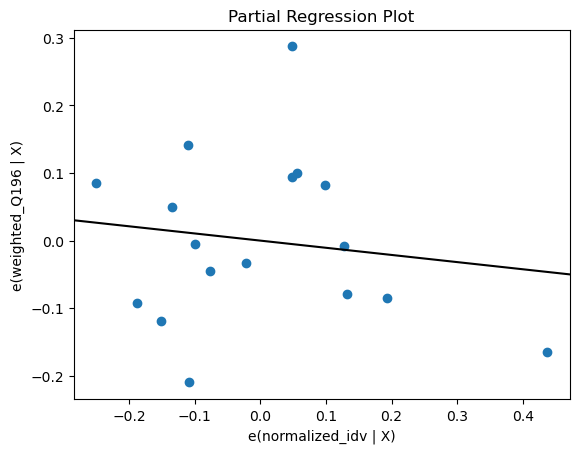

In [35]:
sm.graphics.plot_partregress(data = merged_df,endog = 'weighted_Q196',exog_i = 'normalized_idv',exog_others=['GDP_per_capita'],obs_labels=False)
plt.show()

https://www.statsmodels.org/devel/examples/notebooks/generated/regression_plots.html

In [37]:
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_Q30 = data[['B_COUNTRY_ALPHA','Q30','W_WEIGHT']]
country_Q30 = country_Q30[country_Q30.Q30 > 0]
print(country_Q30.head())
country_Q30.Q30 = country_Q30.Q30.apply(lambda x: 1 if x == 1 else 0)
print(country_Q30.head())

country_Q30['weighted_Q30'] = country_Q30.Q30 * country_Q30.W_WEIGHT
country_Q30.drop(columns=['Q30','W_WEIGHT'],inplace=True)
country_Q30 = country_Q30.groupby('B_COUNTRY_ALPHA')['weighted_Q30'].mean().reset_index()

merged_df = country_Q30.merge(individual_collective,how ='outer',on='B_COUNTRY_ALPHA')
merged_df = merged_df[~merged_df.weighted_Q30.isna()]
merged_df = merged_df[~merged_df.normalized_idv.isna()]
merged_df

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1302/2219409963.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


  B_COUNTRY_ALPHA  Q30  W_WEIGHT
0             AND    3       1.0
1             AND    3       1.0
2             AND    3       1.0
3             AND    4       1.0
4             AND    3       1.0
  B_COUNTRY_ALPHA  Q30  W_WEIGHT
0             AND    0       1.0
1             AND    0       1.0
2             AND    0       1.0
3             AND    0       1.0
4             AND    0       1.0


,B_COUNTRY_ALPHA,weighted_Q30,normalized_idv
1,ARG,0.043271,0.529412
6,BRA,0.024686,0.623529
7,CAN,0.022149,0.129412
8,CHL,0.039759,0.800000
10,COL,0.056579,0.917647
12,CZE,0.049040,0.388235
17,GBR,0.008383,0.023529
25,JPN,0.013722,0.529412
29,KOR,0.061044,0.858824
35,MEX,0.063514,0.717647


In [38]:
merged_df = merged_df.merge(gdp_countries,how='outer',on='B_COUNTRY_ALPHA')
merged_df

,B_COUNTRY_ALPHA,weighted_Q30,normalized_idv,GDP_per_capita
0,ARG,0.043271,0.529412,11531.737532
1,BRA,0.024686,0.623529,8566.870194
2,CAN,0.022149,0.129412,48121.027594
3,CHL,0.039759,0.800000,15039.445811
4,COL,0.056579,0.917647,6297.632846
...,...,...,...,...
261,XKX,NaN,NaN,4623.622365
262,YEM,NaN,NaN,692.293324
263,ZAF,NaN,NaN,6674.155752
264,ZMB,NaN,NaN,1303.526137


In [41]:
merged_df = merged_df[~merged_df.normalized_idv.isna()]

In [43]:
merged_df = merged_df[~merged_df.GDP_per_capita.isna()]

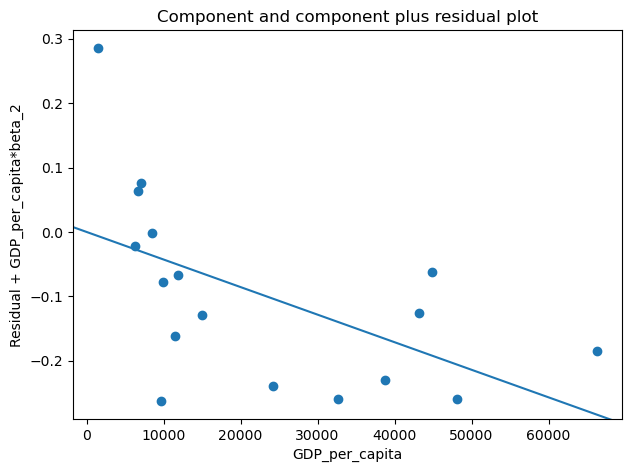

In [63]:
lm = ols("weighted_Q196 ~ normalized_idv + GDP_per_capita", data=merged_df).fit()
#CCPR
fig = sm.graphics.plot_ccpr(lm, "GDP_per_capita")
fig.tight_layout(pad=1.0)

eval_env: 1


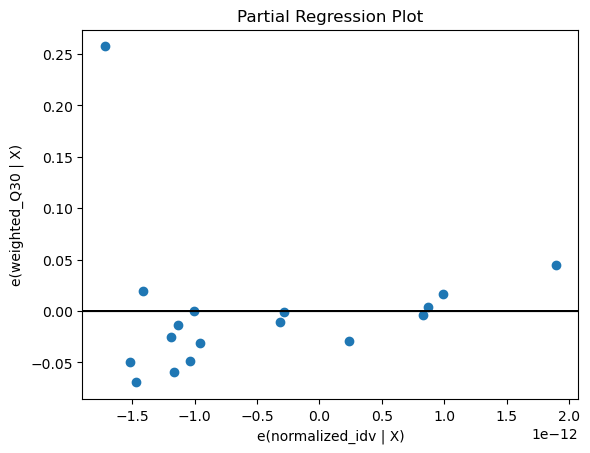

In [47]:
sm.graphics.plot_partregress(data = merged_df,endog = 'weighted_Q30',exog_i = 'normalized_idv',exog_others=['normalized_idv','GDP_per_capita'],obs_labels=False)
plt.show()

eval_env: 1


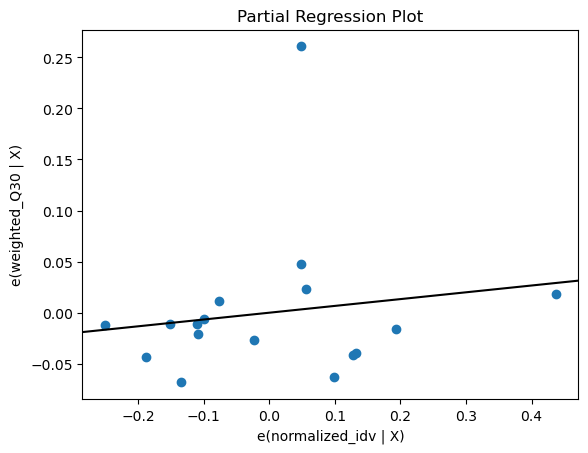

In [48]:
sm.graphics.plot_partregress(data = merged_df,endog = 'weighted_Q30',exog_i = 'normalized_idv',exog_others=['GDP_per_capita'],obs_labels=False)
plt.show()

https://www.kirenz.com/post/2021-11-14-linear-regression-diagnostics-in-python/linear-regression-diagnostics-in-python/

CCPR plot:he Component-Component plus Residual (CCPR) plot provides another way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables. They are also a good way to see if the predictors have a linear relationship with the dependent variable.

A significant difference between the residual line and the actual distribution of values indicates that the predictor does not have a linear relationship with the dependent variable.

In [50]:
lm = ols("weighted_Q30 ~ normalized_idv + GDP_per_capita", data=merged_df).fit()

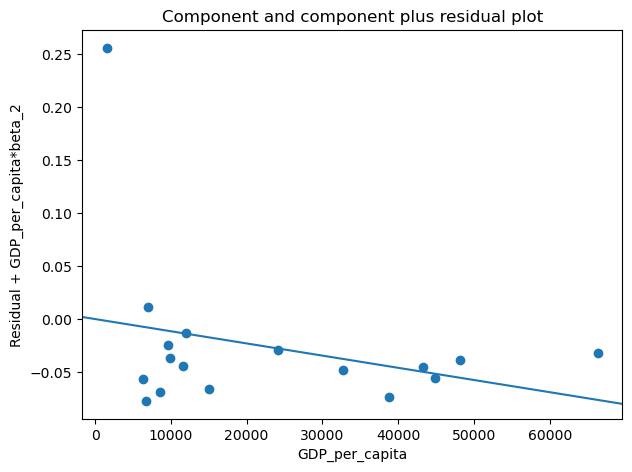

In [51]:
#CCPR
fig = sm.graphics.plot_ccpr(lm, "GDP_per_capita")
fig.tight_layout(pad=1.0)

In [64]:
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')
country_Q197 = data[['B_COUNTRY_ALPHA','Q197','W_WEIGHT']]
country_Q197 = country_Q197[country_Q197.Q197 > 0]

country_Q197.Q197 = country_Q197.Q197.apply(lambda x: 1 if x == 1 else 0)
print(country_Q197.head())

country_Q197['weighted_Q197'] = country_Q197.Q197 * country_Q197.W_WEIGHT
country_Q197.drop(columns=['Q197','W_WEIGHT'],inplace=True)
country_Q197 = country_Q197.groupby('B_COUNTRY_ALPHA')['weighted_Q197'].mean().reset_index()

merged_df = country_Q197.merge(individual_collective,how ='outer',on='B_COUNTRY_ALPHA')
merged_df = merged_df[~merged_df.weighted_Q197.isna()]
merged_df = merged_df[~merged_df.normalized_idv.isna()]

merged_df = merged_df.merge(gdp_countries,how='outer',on='B_COUNTRY_ALPHA')
merged_df = merged_df[~merged_df.normalized_idv.isna()]
merged_df = merged_df[~merged_df.GDP_per_capita.isna()]




/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1302/3725963868.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


  B_COUNTRY_ALPHA  Q197  W_WEIGHT
0             AND     0       1.0
1             AND     0       1.0
2             AND     0       1.0
3             AND     0       1.0
4             AND     0       1.0


eval_env: 1


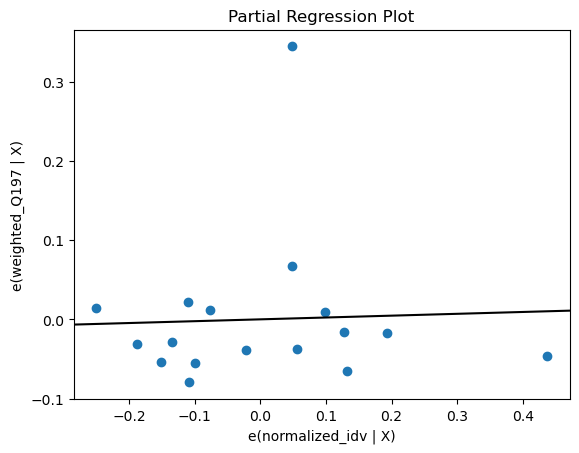

In [65]:
sm.graphics.plot_partregress(data = merged_df,endog = 'weighted_Q197',exog_i = 'normalized_idv',exog_others=['GDP_per_capita'],obs_labels=False)
plt.show()

In [66]:
data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')

/var/folders/h1/_0238p116qdc782gkpb3sd000000gp/T/ipykernel_1302/3442601353.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/Nischal/Documents/sunwater/WVS_Cross-National_Wave_7_csv_v5_0.csv')


In [76]:
#no match
(data.columns == 'SurvSAgg').sum()

0